In [1]:
import pandas as pd
data = pd.read_excel('Fidelity_Questionnaire.xlsx')  

In [2]:
min_age = 20

data = data[(data["年齡"] != "30+")]
data = data[data["年齡"] >= min_age]

allmen = data[data["性別"] == "男"] 
allwomen = data[data["性別"] == "女"] 
print("20~29總人數:", len(allmen) + len(allwomen))
print("20~29男生總人數:", len(allmen))
print("20~29女生總人數:", len(allwomen))
print("--------")
all_interest_people = data[(data["我目前對於投資理財"].str.contains("有點")) | (data["我目前對於投資理財"].str.contains("極具"))]
all_interest_men = all_interest_people[all_interest_people["性別"] == "男"]
print("20~29且有興趣數量:", len(all_interest_people))
print("20~29且有興趣男生數量:", len(all_interest_men))
print("20~29且有興趣女生數量:", len(all_interest_people) - len(all_interest_men))
print("--------")
all_interest_people_without_fund = all_interest_people[~all_interest_people["我有以下實際操作金融商品的經驗： (可複選)"].str.contains("基金")]
all_interest_men_without_fund = all_interest_people_without_fund[all_interest_people_without_fund["性別"] == "男"]
print("20~29且有興趣且沒接觸過基金數量:", len(all_interest_people_without_fund))
print("20~29且有興趣男生數量:", len(all_interest_men_without_fund))
print("20~29且有興趣女生數量:", len(all_interest_people_without_fund) - len(all_interest_men_without_fund))

20~29總人數: 539
20~29男生總人數: 189
20~29女生總人數: 350
--------
20~29且有興趣數量: 476
20~29且有興趣男生數量: 169
20~29且有興趣女生數量: 307
--------
20~29且有興趣且沒接觸過基金數量: 418
20~29且有興趣男生數量: 145
20~29且有興趣女生數量: 273


In [3]:
def precent_calculator(numerator, denominator):
    return round(len(numerator) / len(denominator), 3) * 100

### 20-29操作投資商品經驗

In [4]:
no_any_exp = data[data["我有以下實際操作金融商品的經驗： (可複選)"] == "我沒有任何實際操作經驗。"]
print("沒有任何操作經驗: %.2f" % (precent_calculator(no_any_exp, data)))
have_fund_exp = data[data["我有以下實際操作金融商品的經驗： (可複選)"].str.contains("基金")]
print("擁有基金操作經驗: %.2f" % (precent_calculator(have_fund_exp, data)))

沒有任何操作經驗: 57.70
擁有基金操作經驗: 11.50


### 知道部分基金相較於股票，有分散風險的功能（擁有基本金融知識）

In [5]:
have_basic_FQ = data[data["我知道部分基金相較於股票，有分散風險的功能"] == "是"]
print("知道部分基金相較於股票，有分散風險的功能: %.2f" % (precent_calculator(have_basic_FQ, data)))

知道部分基金相較於股票，有分散風險的功能: 86.30


### 對投資很有興趣或有點興趣，但尚未接觸基金的人

In [6]:
precent_calculator(all_interest_people_without_fund, data)

77.60000000000001

### 這些人每週願意花多少時間去研究投資

In [7]:
all_interest_people_without_fund["我平均每週願意花在研究理財的時間"].value_counts(normalize=True)

30分鐘至1小時    0.361244
30分鐘以內      0.244019
1-2小時       0.236842
2-3小時       0.081340
3小時以上       0.076555
Name: 我平均每週願意花在研究理財的時間, dtype: float64

### 這些人每年平均可以存下的存款

In [8]:
all_interest_people_without_fund["我每年平均可以存下的存款"].value_counts(normalize=True)

1萬到5萬      0.430622
1萬以下       0.346890
6萬-10萬     0.122010
11萬-20萬    0.050239
21-40萬     0.028708
61萬以上      0.011962
41-60萬     0.009569
Name: 我每年平均可以存下的存款, dtype: float64

### 這些人是否覺得自己有閒置的存款可以開始投資

In [9]:
all_interest_people_without_fund["我覺得自己的確有閒置的存款可以開始投資"].value_counts(normalize=True)

是    0.655502
否    0.344498
Name: 我覺得自己的確有閒置的存款可以開始投資, dtype: float64

### 這些人願意接受的基金低消

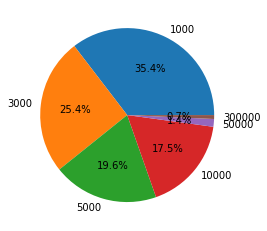

In [19]:
import matplotlib.pyplot as plt
labels = ['1000', '3000', '5000', '10000', '50000', '300000']
plt.pie(all_interest_people_without_fund["我可接受的基金最低申購金額（a.k.a 低消）"].value_counts(normalize=True),
        labels=labels,
        autopct='%1.1f%%')
plt.show()

In [11]:
reasons_dict = {"想買酷東西 (抱歉了錢錢)": 0, 
                 "醫療需求: 戴牙套、近視雷射......等": 1, 
                 "還學貸": 2,
                 "想出外旅遊渡假": 3,
                 "存留學/檢定考費用": 4,
                 "爭取經濟獨立": 5,
                 "存緊急預備金": 6,
                 "存錢買房/買車": 7,
                 "存退休金": 8}

experiences_dict = {"股票": 0, 
                 "ETF": 1, 
                 "基金 (需開設基金戶)": 2,
                 "債券": 3,
                 "外幣": 4,
                 "衍生性金融商品，如期貨、選擇權、權證或其他": 5,
                 "我沒有任何實際操作經驗。": 6}

difficulties_dict = {"害怕虧損": 0, 
                 "沒時間親自研究": 1, 
                 "種類過多，選擇困難": 2,
                 "詳讀各類基金的最低申購金額後，覺得買不起或過高不符合自身期待": 3,
                 "無明確理財目標，缺乏持續動力": 4,
                 "開戶不易": 5,
                 "不信任基金經理人。": 6,
                 "不熟悉此類產品，看不懂背後連動的投資標的": 7,
                 "覺得手續費及管理費過高 (如1.5%)": 8,
                 "缺少諮詢服務": 9, 
                 "贖回不便": 10, 
                 "報酬率過低，偏好風險性更高的產品": 11,
                 "我目前有投資基金，且沒有任何投資基金上的困難。": 12}

media_dict = {"電視/網路廣告；文章/影片/社群網站 業配": 0, 
                 "實體講座/工作坊": 1, 
                 "金融機構的專人介紹": 2,
                 "路上的互動式遊戲數位看板": 3,
                 "親友分享": 4,
                 "易上手的App/網頁操作介面": 5,
                 "官方發行的懶人包": 6,
                 "投信網站中的知識小遊戲": 7}

class Parser:
    def __init__(self, targets, target_dict):
        self.targets = targets  # list
        self.target_dict = target_dict  # dict
    def get_index(self):
        result = []
        for target in self.targets:
            if not target in self.target_dict:
                pass
            else: 
                result.append(self.target_dict[target])
        return result

class Results:
    def __init__(self):
        self.results = []
    def append(self, list_for_parser, dict_for_parser):
        tmp_p = Parser(list_for_parser, dict_for_parser)
        tmp_list = tmp_p.get_index()
        self.results.append(tmp_list)
    def dump(self):
        return self.results
    def get_score(self, size):
        ans = []
        results = self.results 
        for index in range(0, size):
            ans.append(sum([result.count(index) for result in results]))
        return ans
    
class Score:
    def __init__(self):
        self.r_score = []
        self.e_score = []
        self.d_score = []
        self.m_score = []

    def normalize(self, size):
        self.r_score = [s / size for s in self.r_score]
        self.e_score = [s / size for s in self.e_score]
        self.d_score = [s / size for s in self.d_score]
        self.m_score = [s / size for s in self.m_score]

In [12]:
def rundown(all_people):
    reasons_results = Results()
    experiences_results = Results()
    difficulties_results = Results()
    media_results = Results()

    list_index = all_people.index.values.tolist()
    for people_index in list_index:
        reasons = data["我近期投資及存錢的目的 (至多3項)"][people_index].split(', ')
        experiences = data["我有以下實際操作金融商品的經驗： (可複選)"][people_index].split(', ')
        difficulties = data["我沒有投資基金的原因，或是我在基金投資上遇到的困難如下： (至多五項)"][people_index].split(', ')
        media = data["如果有機會，最能吸引我主動投資基金的媒介包含：（至多三項）"][people_index].split(', ')
        reasons_results.append(reasons, reasons_dict)
        experiences_results.append(experiences, experiences_dict)
        difficulties_results.append(difficulties, difficulties_dict)
        media_results.append(media, media_dict)

    score = Score()
    score.r_score = reasons_results.get_score(len(reasons_dict))
    score.e_score = experiences_results.get_score(len(experiences_dict))
    score.d_score = difficulties_results.get_score(len(difficulties_dict))
    score.m_score = media_results.get_score(len(media_dict))
    return score

In [13]:
all_score = rundown(all_interest_people_without_fund)
all_score.normalize(len(all_interest_people_without_fund))

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % (height),
                ha='center', va='bottom')

In [16]:
def get_top_element(target_list, top_n):
    top_n_idx = np.argsort(target_list)[-top_n:]
    top_n_values = [target_list[i] for i in top_n_idx]
    return top_n_idx, top_n_values

In [17]:
def plot_bar(plt, score_list, top_n):
    top_n_idx, top_n_values = get_top_element(score_list, top_n)
    not_top_n_idx = [x for x in np.arange(len(score_list)) if x not in top_n_idx]
    not_top_n_values = [x for x in score_list if x not in top_n_values]
    rects1 = plt.bar(top_n_idx,
            top_n_values, 
            width=0.25, 
            color='red')
    rects2 = plt.bar(not_top_n_idx,
            not_top_n_values, 
            width=0.25,
            color='blue')
    plt.xticks(np.arange(0, len(score_list), 1))

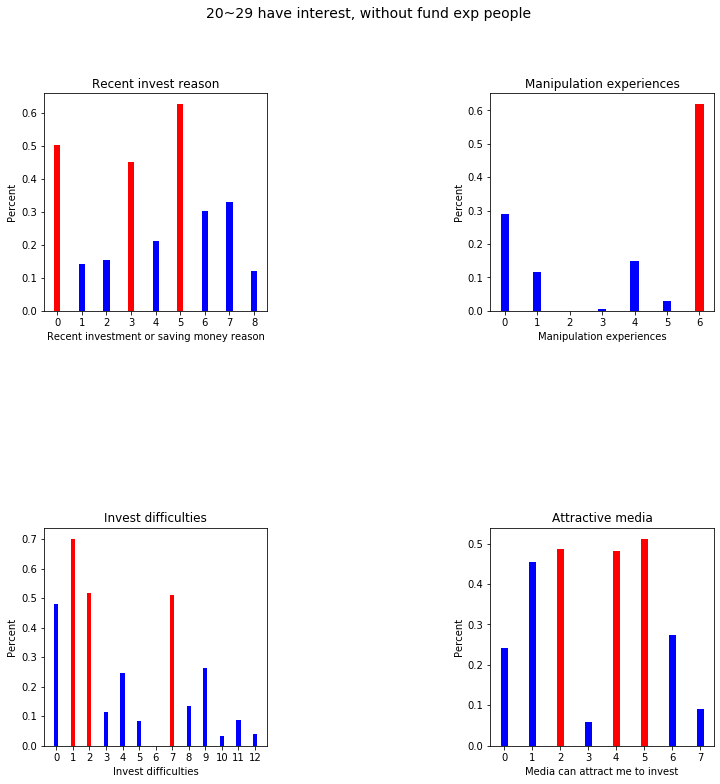

In [18]:
# bar_width=0.25
plt.figure(figsize=(12,12))
plt.suptitle('20~29 have interest, without fund exp people', fontsize=14)
plt.subplot(221)
plot_bar(plt, all_score.r_score, 3)
plt.title("Recent invest reason")
plt.xticks(np.arange(len(reasons_dict)), reasons_dict.values())
plt.ylabel("Percent")
plt.xlabel("Recent investment or saving money reason")

plt.subplot(222)
plot_bar(plt, all_score.e_score, 1)
plt.title("Manipulation experiences")
plt.xticks(np.arange(len(experiences_dict)), experiences_dict.values())
plt.ylabel("Percent")
plt.xlabel("Manipulation experiences")

plt.subplot(223)
plot_bar(plt, all_score.d_score, 3)
plt.title("Invest difficulties")
plt.xticks(np.arange(len(difficulties_dict)), difficulties_dict.values())
plt.ylabel("Percent")
plt.xlabel("Invest difficulties")

ax = plt.subplot(224)
plt.title("Attractive media")
plot_bar(plt, all_score.m_score, 3)
plt.ylabel("Percent")
plt.xlabel("Media can attract me to invest")
plt.subplots_adjust(wspace=1, hspace=1) #調整子圖間距
plt.show()